In [254]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [255]:
miss_df = pd.read_csv("landslide_data3_miss.csv")
original_df = pd.read_csv("landslide_data3_original.csv")
interpolated_df=miss_df.interpolate()
print(interpolated_df)

          dates stationid  temperature  humidity     pressure      rain  \
0    08-07-2018       t10     25.46875  82.18750  1036.346875      6.75   
1    09-07-2018       t10     26.19298  83.14912  1037.604386   1761.75   
2    10-07-2018       t10     25.17021  85.34043  1037.889362    652.50   
3    11-07-2018       t10     24.61972  87.68657  1036.857463    963.00   
4    12-07-2018       t10     24.06923  87.64615  1027.830769    254.25   
..          ...       ...          ...       ...          ...       ...   
940  21-11-2018        t9     13.80851  58.69630  1026.797407  73577.25   
941  22-11-2018        t9     15.52482  63.16312  1027.495248  65301.75   
942  23-11-2018        t9     15.81560  59.21277  1029.318511  73534.50   
943  24-11-2018        t9     16.58571  54.63571  1026.776357  72283.50   
944  25-11-2018        t9     17.90000  49.41000  1026.771200  71799.75   

     lightavgw/o0  lightmax  moisture  
0          5.5000    4000.0   0.00000  
1         11.8448  

In [256]:
q1_q3_df = interpolated_df.quantile([0.25,0.75])
print(q1_q3_df)

      temperature   humidity     pressure    rain  lightavgw/o0  lightmax  \
0.25     18.31469  73.136805  1009.620000    0.00      417.0392    4000.0   
0.75     24.41667  98.605635  1020.820611  987.75     4488.9103   54612.0   

      moisture  
0.25    2.9930  
0.75   64.5357  


/var/folders/sq/_g9d40851fd2n842lj79vc680000gn/T/ipykernel_12745/3659222012.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1_q3_df = interpolated_df.quantile([0.25,0.75])


In [257]:
print("The Outliers For Temperature Are")
print(interpolated_df.loc[np.logical_not(np.logical_and(interpolated_df['temperature']>(q1_q3_df['temperature'].iat[0])-(1.5*(q1_q3_df['temperature'].iat[1]-q1_q3_df['temperature'].iat[0])),interpolated_df['temperature']<(q1_q3_df['temperature'].iat[1])+(1.5*(q1_q3_df['temperature'].iat[1]-q1_q3_df['temperature'].iat[0]))))]['temperature'])

The Outliers For Temperature Are
509    7.6729
510    7.6729
511    7.6729
512    7.6729
513    7.6729
514    7.6729
515    7.6729
516    7.6729
517    7.6729
518    7.6729
Name: temperature, dtype: float64


<AxesSubplot: >

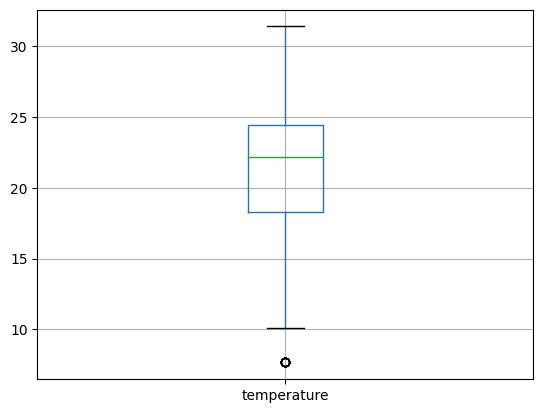

In [258]:
interpolated_df.boxplot(column=['temperature'])

In [259]:
print("The Outliers For Rain Are")
print(interpolated_df.loc[np.logical_not(np.logical_and(interpolated_df['rain']>(q1_q3_df['rain'].iat[0])-(1.5*(q1_q3_df['rain'].iat[1]-q1_q3_df['rain'].iat[0])),interpolated_df['rain']<(q1_q3_df['rain'].iat[1])+(1.5*(q1_q3_df['rain'].iat[1]-q1_q3_df['rain'].iat[0]))))]['rain'])

The Outliers For Rain Are
135    13583.250
136     6791.625
199    15459.750
200    14001.750
201    16571.250
         ...    
940    73577.250
941    65301.750
942    73534.500
943    72283.500
944    71799.750
Name: rain, Length: 185, dtype: float64


<AxesSubplot: >

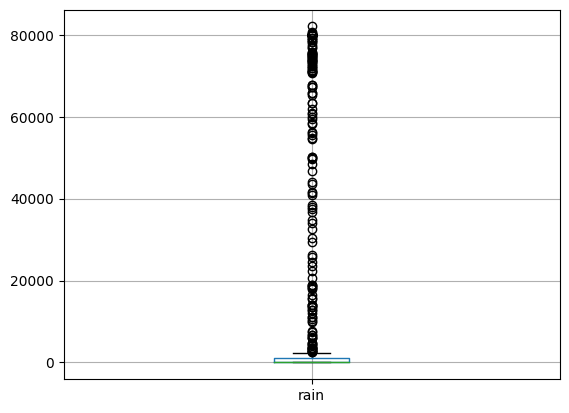

In [260]:
interpolated_df.boxplot(column=['rain'])

/var/folders/sq/_g9d40851fd2n842lj79vc680000gn/T/ipykernel_12745/3088902204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated_df['temperature'][i] = temperature_median


<AxesSubplot: >

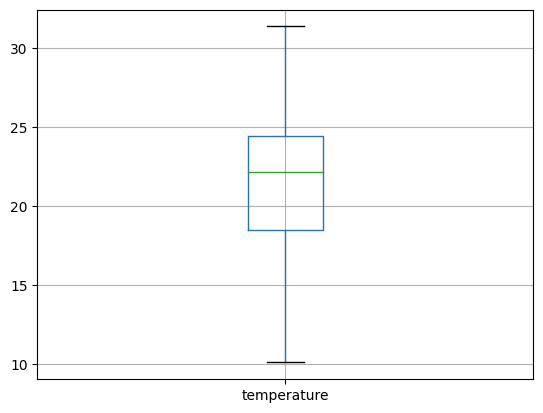

In [261]:
#The Plots After Replacing the Outliers With the median of the attributes temperature and rain
temperature_median = np.median(interpolated_df['temperature'])
for i in range(len(interpolated_df)):
    if not (interpolated_df['temperature'][i] > (q1_q3_df['temperature'].iat[0])-(1.5*(q1_q3_df['temperature'].iat[1]-q1_q3_df['temperature'].iat[0])) and interpolated_df['temperature'][i] < (q1_q3_df['temperature'].iat[1])+(1.5*(q1_q3_df['temperature'].iat[1]-q1_q3_df['temperature'].iat[0]))):
        interpolated_df['temperature'][i] = temperature_median
interpolated_df.boxplot(column=['temperature'])

/var/folders/sq/_g9d40851fd2n842lj79vc680000gn/T/ipykernel_12745/4294174067.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated_df['rain'][i] = rain_median


<AxesSubplot: >

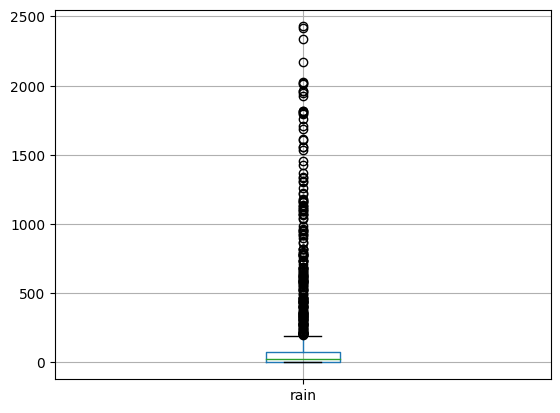

In [262]:
rain_median = np.median(interpolated_df['rain'])
for i in range(len(interpolated_df)):
    if not (interpolated_df['rain'][i] > (q1_q3_df['rain'].iat[0])-(1.5*(q1_q3_df['rain'].iat[1]-q1_q3_df['rain'].iat[0])) and interpolated_df['rain'][i] < (q1_q3_df['rain'].iat[1])+(1.5*(q1_q3_df['rain'].iat[1]-q1_q3_df['rain'].iat[0]))):
        interpolated_df['rain'][i] = rain_median
interpolated_df.boxplot(column=['rain'])

In [262]:
# Outliers Still Exist as the IQR,Q1,Q3 Changed after setting the previous attributes to the median and new outliers have been formed, however you can see that the range of the boxplot has changed in the rain boxplot